# Extracci√≥n del Archivo Tratado

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df_model = pd.read_csv("/content/datos_tratados.csv")



In [56]:
df_model.head()


ID_Cliente  Cancelado  Genero  Adulto_Mayor  Socio  Dependientes  \
0  0002-ORFBO          0  Female             0      1             1   
1  0003-MKNFE          0    Male             0      0             0   
2  0004-TLHLJ          1    Male             0      0             0   
3  0011-IGKFF          1    Male             1      1             0   
4  0013-EXCHZ          1  Female             1      1             0   

   Antiguedad  Servicio_Telefono  Lineas_Adicionales Tipo_Internet  ...  \
0           9                  1                   0           DSL  ...   
1           9                  1                   1           DSL  ...   
2           4                  1                   0   Fiber optic  ...   
3          13                  1                   0   Fiber optic  ...   
4           3                  1                   0   Fiber optic  ...   

   Soporte_Tecnico  TV_Stream  Cine_Stream        Contrato  Factura_Digital  \
0                1          1            0        One year                1   
1                0          0            1  Month-to-month                0   
2                0          0            0  Month-to-month                1   
3                0          1            1  Month-to-month                1   
4                1          1            0  Month-to-month                1   

        Metodo_Pago Cargo_Mensual  Cargo_Total Cuentas_Diarias  \
0      Mailed check          65.6       593.30        2.186667   
1      Mailed check          59.9       542.40        1.996667   
2  Electronic check          73.9       280.85        2.463333   
3  Electronic check          98.0      1237.85        3.266667   
4      Mailed check          83.9       267.40        2.796667   

   Total_Servicios  
0                5  
1                3  
2                3  
3                6  
4                4  

[5 rows x 23 columns]

In [57]:
# üìå Eliminaci√≥n de columnas irrelevantes
df_model = df_model.drop(columns=['ID_Cliente', 'Genero', 'Tipo_Internet', 'Contrato', 'Metodo_Pago'] )

# Verificar las columnas resultantes
print("Columnas despu√©s de la limpieza:", df_model.columns.tolist())
print("Shape final:", df_model.shape)

Columnas despu√©s de la limpieza: ['Cancelado', 'Adulto_Mayor', 'Socio', 'Dependientes', 'Antiguedad', 'Servicio_Telefono', 'Lineas_Adicionales', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'TV_Stream', 'Cine_Stream', 'Factura_Digital', 'Cargo_Mensual', 'Cargo_Total', 'Cuentas_Diarias', 'Total_Servicios']
Shape final: (7043, 18)


In [58]:
# Identificar variables categ√≥ricas
cat_cols = df_model.select_dtypes(include=['object']).columns.tolist()
print("Columnas categ√≥ricas:", cat_cols)

Columnas categ√≥ricas: []


In [59]:
# One-Hot Encoding para variables categ√≥ricas
df_encoded = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)

print("Shape despu√©s del encoding:", df_encoded.shape)
df_encoded.head()


Shape despu√©s del encoding: (7043, 18)


Cancelado  Adulto_Mayor  Socio  Dependientes  Antiguedad  \
0          0             0      1             1           9   
1          0             0      0             0           9   
2          1             0      0             0           4   
3          1             1      1             0          13   
4          1             1      1             0           3   

   Servicio_Telefono  Lineas_Adicionales  Seguridad_Online  Respaldo_Online  \
0                  1                   0                 0                1   
1                  1                   1                 0                0   
2                  1                   0                 0                0   
3                  1                   0                 0                1   
4                  1                   0                 0                0   

   Proteccion_Dispositivo  Soporte_Tecnico  TV_Stream  Cine_Stream  \
0                       0                1          1            0   
1                       0                0          0            1   
2                       1                0          0            0   
3                       1                0          1            1   
4                       0                1          1            0   

   Factura_Digital  Cargo_Mensual  Cargo_Total  Cuentas_Diarias  \
0                1           65.6       593.30         2.186667   
1                0           59.9       542.40         1.996667   
2                1           73.9       280.85         2.463333   
3                1           98.0      1237.85         3.266667   
4                1           83.9       267.40         2.796667   

   Total_Servicios  
0                5  
1                3  
2                3  
3                6  
4                4

Verificaci√≥n de la Proporci√≥n de Cancelaci√≥n (Churn)

In [60]:
# Conteo absoluto
conteo = df_model['Cancelado'].value_counts()

# Proporci√≥n relativa (%)
proporcion = df_model['Cancelado'].value_counts(normalize=True) * 100

print("Conteo de clientes:\n", conteo)
print("\nProporci√≥n de clientes (%):\n", proporcion)


Conteo de clientes:
 Cancelado
0    5174
1    1869
Name: count, dtype: int64

Proporci√≥n de clientes (%):
 Cancelado
0    73.463013
1    26.536987
Name: proportion, dtype: float64


Normalizaci√≥n y Estandarizaci√≥n de Variables Num√©ricas


In [61]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos las columnas num√©ricas
num_cols = ['Antiguedad', 'Cargo_Mensual', 'Cargo_Total', 'Cuentas_Diarias', 'Total_Servicios']

# Creamos el scaler
scaler = StandardScaler()

# Aplicamos estandarizaci√≥n solo a las num√©ricas
df_model[num_cols] = scaler.fit_transform(df_model[num_cols])

# Verificamos
df_model[num_cols].head()

Antiguedad  Cargo_Mensual  Cargo_Total  Cuentas_Diarias  Total_Servicios
0   -0.951682       0.027862    -0.746188         0.027862         0.471619
1   -0.951682      -0.161583    -0.768662        -0.161583        -0.431116
2   -1.155283       0.303720    -0.884145         0.303720        -0.431116
3   -0.788800       1.104706    -0.461598         1.104706         0.922987
4   -1.196004       0.636080    -0.890084         0.636080         0.020252

üéØ Correlaci√≥n y Selecci√≥n de Variables

In [62]:
df_model.head()


Cancelado  Adulto_Mayor  Socio  Dependientes  Antiguedad  \
0          0             0      1             1   -0.951682   
1          0             0      0             0   -0.951682   
2          1             0      0             0   -1.155283   
3          1             1      1             0   -0.788800   
4          1             1      1             0   -1.196004   

   Servicio_Telefono  Lineas_Adicionales  Seguridad_Online  Respaldo_Online  \
0                  1                   0                 0                1   
1                  1                   1                 0                0   
2                  1                   0                 0                0   
3                  1                   0                 0                1   
4                  1                   0                 0                0   

   Proteccion_Dispositivo  Soporte_Tecnico  TV_Stream  Cine_Stream  \
0                       0                1          1            0   
1                       0                0          0            1   
2                       1                0          0            0   
3                       1                0          1            1   
4                       0                1          1            0   

   Factura_Digital  Cargo_Mensual  Cargo_Total  Cuentas_Diarias  \
0                1       0.027862    -0.746188         0.027862   
1                0      -0.161583    -0.768662        -0.161583   
2                1       0.303720    -0.884145         0.303720   
3                1       1.104706    -0.461598         1.104706   
4                1       0.636080    -0.890084         0.636080   

   Total_Servicios  
0         0.471619  
1        -0.431116  
2        -0.431116  
3         0.922987  
4         0.020252

üìä 1. Matriz de Correlaci√≥n

In [63]:
# Correlaci√≥n de las variables num√©ricas con Cancelado
corr_cancelado = df_model.corr(numeric_only=True)['Cancelado'].sort_values(ascending=False)

print("üìä Correlaci√≥n de Cancelado con variables num√©ricas:")
print(corr_cancelado)

üìä Correlaci√≥n de Cancelado con variables num√©ricas:
Cancelado                 1.000000
Cuentas_Diarias           0.193356
Cargo_Mensual             0.193356
Factura_Digital           0.191825
Adulto_Mayor              0.150889
TV_Stream                 0.063228
Cine_Stream               0.061382
Lineas_Adicionales        0.040102
Servicio_Telefono         0.011942
Total_Servicios          -0.020051
Proteccion_Dispositivo   -0.066160
Respaldo_Online          -0.082255
Socio                    -0.150448
Dependientes             -0.164221
Soporte_Tecnico          -0.164674
Seguridad_Online         -0.171226
Cargo_Total              -0.199427
Antiguedad               -0.352229
Name: Cancelado, dtype: float64


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


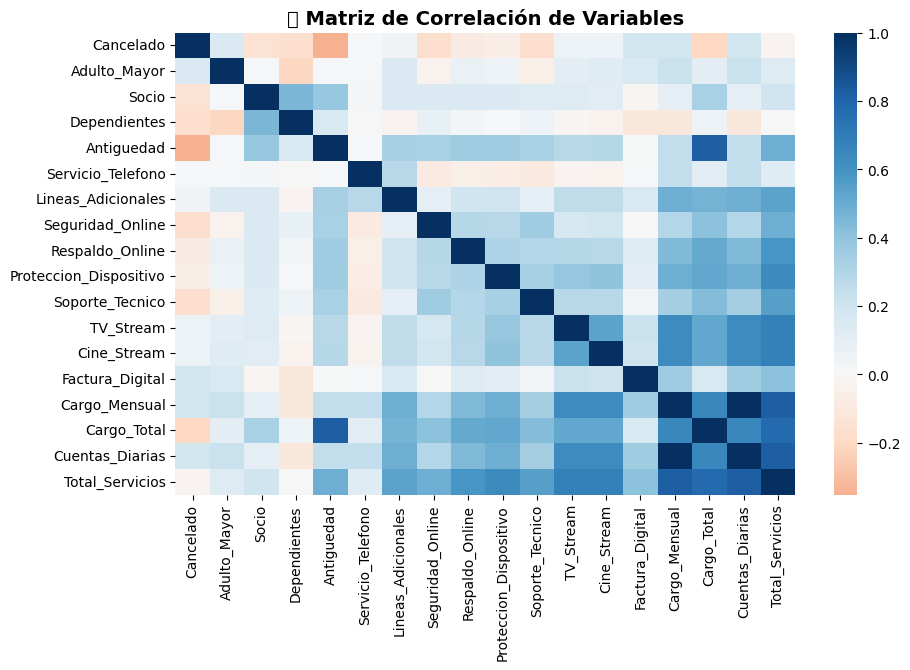

In [64]:
# Matriz de correlaci√≥n
corr_matrix = df_model.corr(numeric_only=True)

# Mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, cmap="RdBu", center=0, annot=False)
plt.title("üîé Matriz de Correlaci√≥n de Variables", fontsize=14, fontweight='bold')
plt.show()

An√°lisis Dirigido:
üîπ Tiempo de Contrato x Cancelaci√≥n

/tmp/ipython-input-4238353412.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_model, x="Cancelado", y="Antiguedad", palette="Set3")


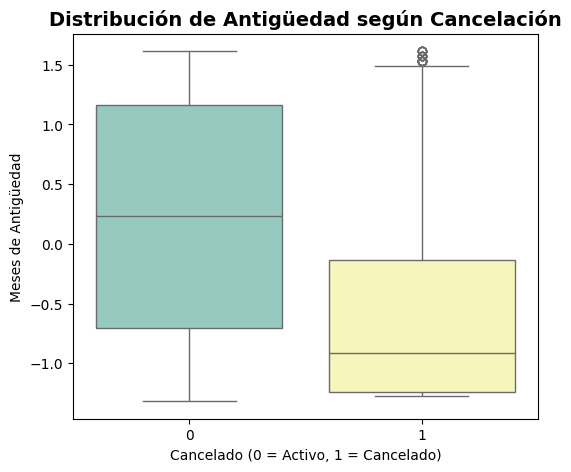

In [65]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df_model, x="Cancelado", y="Antiguedad", palette="Set3")
plt.title("Distribuci√≥n de Antig√ºedad seg√∫n Cancelaci√≥n", fontsize=14, fontweight="bold")
plt.xlabel("Cancelado (0 = Activo, 1 = Cancelado)")
plt.ylabel("Meses de Antig√ºedad")
plt.show()

üîπ Gasto Total x Cancelaci√≥n

/tmp/ipython-input-581204888.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_model, x="Cancelado", y="Cargo_Total", palette="coolwarm")


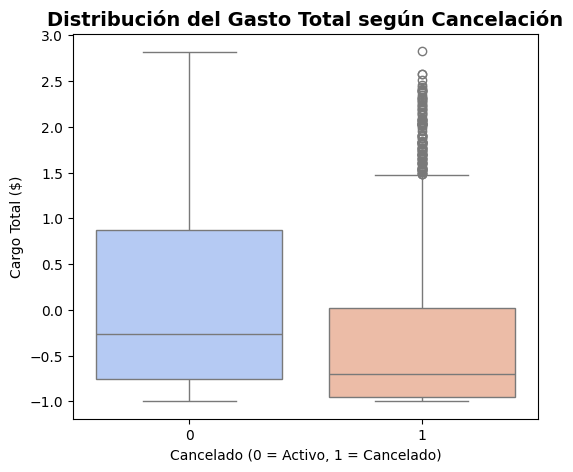

In [66]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df_model, x="Cancelado", y="Cargo_Total", palette="coolwarm")
plt.title("Distribuci√≥n del Gasto Total seg√∫n Cancelaci√≥n", fontsize=14, fontweight="bold")
plt.xlabel("Cancelado (0 = Activo, 1 = Cancelado)")
plt.ylabel("Cargo Total ($)")
plt.show()

üîπ Relaci√≥n entre la Antig√ºedad del Cliente y la Cancelaci√≥n

/tmp/ipython-input-77001859.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_model, x="Cancelado", y="Cargo_Total", jitter=0.3, alpha=0.4, palette="coolwarm")


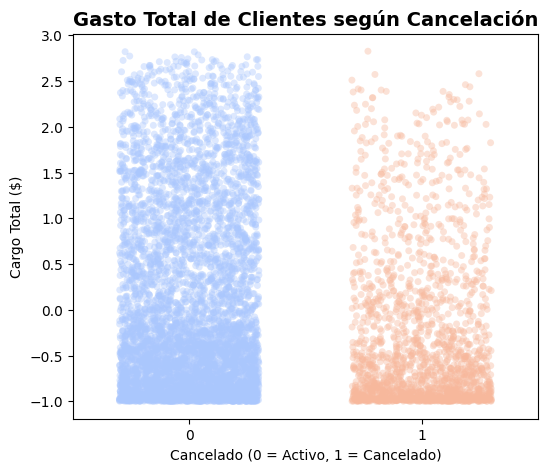

In [67]:
plt.figure(figsize=(6,5))
sns.stripplot(data=df_model, x="Cancelado", y="Cargo_Total", jitter=0.3, alpha=0.4, palette="coolwarm")
plt.title("Gasto Total de Clientes seg√∫n Cancelaci√≥n", fontsize=14, fontweight="bold")
plt.xlabel("Cancelado (0 = Activo, 1 = Cancelado)")
plt.ylabel("Cargo Total ($)")
plt.show()

# ü§ñ Modelado Predictivo

Separaci√≥n de Datos

In [68]:
# Separar features (X) y target (y)
X = df_model.drop("Cancelado", axis=1)
y = df_model["Cancelado"]

# Divisi√≥n de los datos (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tama√±o de entrenamiento:", X_train.shape)
print("Tama√±o de prueba:", X_test.shape)
print("Proporci√≥n de Cancelados en train:", y_train.mean())
print("Proporci√≥n de Cancelados en test:", y_test.mean())

Tama√±o de entrenamiento: (4930, 17)
Tama√±o de prueba: (2113, 17)
Proporci√≥n de Cancelados en train: 0.2653144016227181
Proporci√≥n de Cancelados en test: 0.26549929010885


Creaci√≥n de Modelos

1) Modelo basado en normalizaci√≥n ‚Üí Regresi√≥n Log√≠stica

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Pipeline: normalizaci√≥n + modelo
log_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000, random_state=42))
])

# Entrenamos
log_reg.fit(X_train, y_train)

# Evaluamos
y_pred_log = log_reg.predict(X_test)

2) Modelo sin normalizaci√≥n ‚Üí Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

Evaluaci√≥n de los Modelos

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
                             confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay)

# ----------------------------
# 1) Regresi√≥n Log√≠stica (escala + modelo)
# ----------------------------
log_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000, random_state=42))
    # Sugerido si hay desbalance fuerte: LogisticRegression(class_weight="balanced", ...)
])
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_proba_log = log_reg.predict_proba(X_test)[:, 1]

# ----------------------------
# 2) Random Forest (sin normalizaci√≥n)
# ----------------------------
rf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
# Sugerido si hay desbalance fuerte: RandomForestClassifier(class_weight="balanced", ...)
rf.fit(X_train, y_train)
y_pred_rf  = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# ----------------------------
# Tabla de m√©tricas
# ----------------------------
def metricas(y_true, y_pred, y_proba):
    return {
        "Accuracy":  accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall":    recall_score(y_true, y_pred),
        "F1":        f1_score(y_true, y_pred),
        "ROC-AUC":   roc_auc_score(y_true, y_proba)
    }

resultados = pd.DataFrame([
    {"Modelo": "Logistic Regression", **metricas(y_test, y_pred_log, y_proba_log)},
    {"Modelo": "Random Forest",       **metricas(y_test, y_pred_rf,  y_proba_rf )}
]).set_index("Modelo").round(3)

print("üìä Comparaci√≥n de modelos")
display(resultados.sort_values("F1", ascending=False))



üìä Comparaci√≥n de modelos


Accuracy  Precision  Recall     F1  ROC-AUC
Modelo                                                          
Logistic Regression     0.794      0.642   0.508  0.567    0.833
Random Forest           0.781      0.610   0.488  0.543    0.808

# üìã Interpretaci√≥n y Conclusiones

An√°lisis de la Importancia de las Variables.

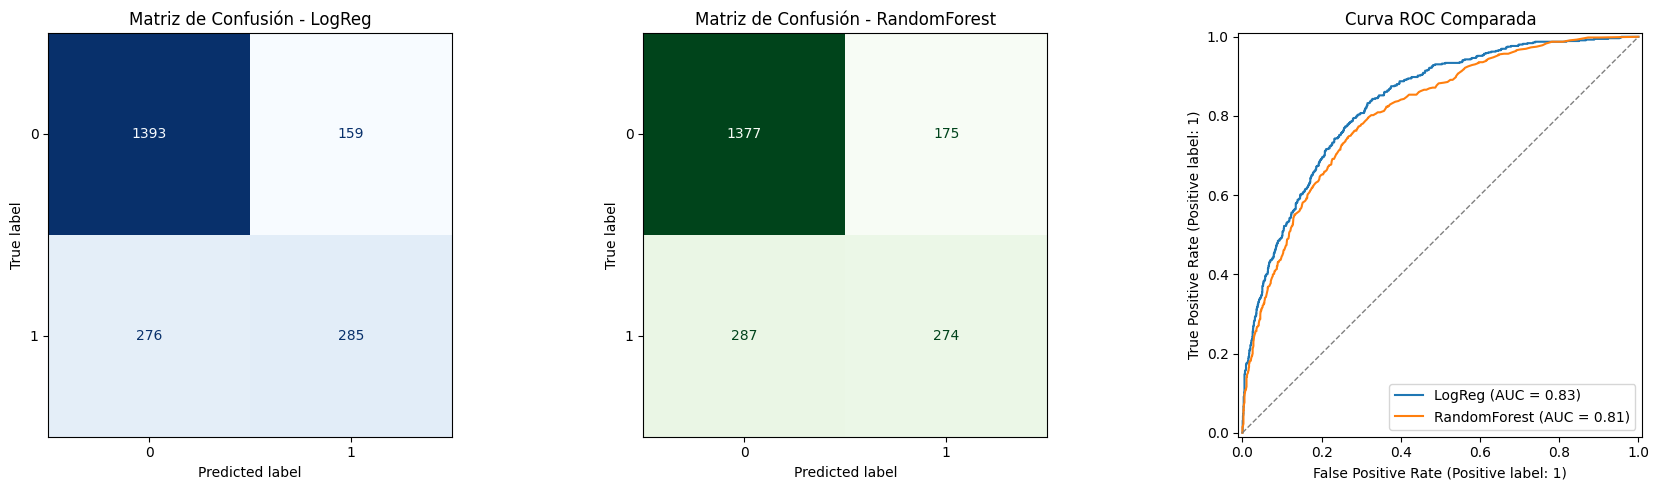

In [80]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))

# Matriz de Confusi√≥n - LogReg
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_log)).plot(
    ax=axs[0], cmap="Blues", values_format='d', colorbar=False
)
axs[0].set_title("Matriz de Confusi√≥n - LogReg")

# Matriz de Confusi√≥n - RandomForest
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot(
    ax=axs[1], cmap="Greens", values_format='d', colorbar=False
)
axs[1].set_title("Matriz de Confusi√≥n - RandomForest")

# Curva ROC combinada
RocCurveDisplay.from_predictions(y_test, y_proba_log, name="LogReg", ax=axs[2])
RocCurveDisplay.from_predictions(y_test, y_proba_rf,  name="RandomForest", ax=axs[2])
axs[2].plot([0,1], [0,1], "--", color="gray", linewidth=1)
axs[2].set_title("Curva ROC Comparada")

plt.tight_layout()
plt.show()

# üìà M√©tricas de Desempe√±o y Validaci√≥n de Modelos

M√©tricas train vs test (para detectar over/underfitting):

In [76]:
def resumen_fit(nombre, modelo, X_tr, y_tr, X_te, y_te):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    yhat_tr = modelo.predict(X_tr); yhat_te = modelo.predict(X_te)
    proba_tr = modelo.predict_proba(X_tr)[:,1]; proba_te = modelo.predict_proba(X_te)[:,1]
    def m(y,yh,p): return dict(
        Acc=accuracy_score(y,yh), Prec=precision_score(y,yh),
        Rec=recall_score(y,yh), F1=f1_score(y,yh), AUC=roc_auc_score(y,p))
    print(f"\n{nombre}:"); print("Train:", {k: round(v,3) for k,v in m(y_tr,yhat_tr,proba_tr).items()})
    print("Test :", {k: round(v,3) for k,v in m(y_te,yhat_te,proba_te).items()})

resumen_fit("LogReg", log_reg, X_train, y_train, X_test, y_test)
resumen_fit("RandomForest", rf,      X_train, y_train, X_test, y_test)


LogReg:
Train: {'Acc': 0.805, 'Prec': 0.669, 'Rec': 0.529, 'F1': 0.591, 'AUC': np.float64(0.841)}
Test : {'Acc': 0.794, 'Prec': 0.642, 'Rec': 0.508, 'F1': 0.567, 'AUC': np.float64(0.833)}

RandomForest:
Train: {'Acc': 0.996, 'Prec': 0.992, 'Rec': 0.992, 'F1': 0.992, 'AUC': np.float64(1.0)}
Test : {'Acc': 0.781, 'Prec': 0.61, 'Rec': 0.488, 'F1': 0.543, 'AUC': np.float64(0.808)}


Reporte de clasificaci√≥n (para ver desempe√±o por clase):

In [77]:
from sklearn.metrics import classification_report
print("LogReg\n", classification_report(y_test, y_pred_log, digits=3))
print("RandomForest\n", classification_report(y_test, y_pred_rf, digits=3))

LogReg
               precision    recall  f1-score   support

           0      0.835     0.898     0.865      1552
           1      0.642     0.508     0.567       561

    accuracy                          0.794      2113
   macro avg      0.738     0.703     0.716      2113
weighted avg      0.783     0.794     0.786      2113

RandomForest
               precision    recall  f1-score   support

           0      0.828     0.887     0.856      1552
           1      0.610     0.488     0.543       561

    accuracy                          0.781      2113
   macro avg      0.719     0.688     0.699      2113
weighted avg      0.770     0.781     0.773      2113



Importancia de variables (explicabilidad):

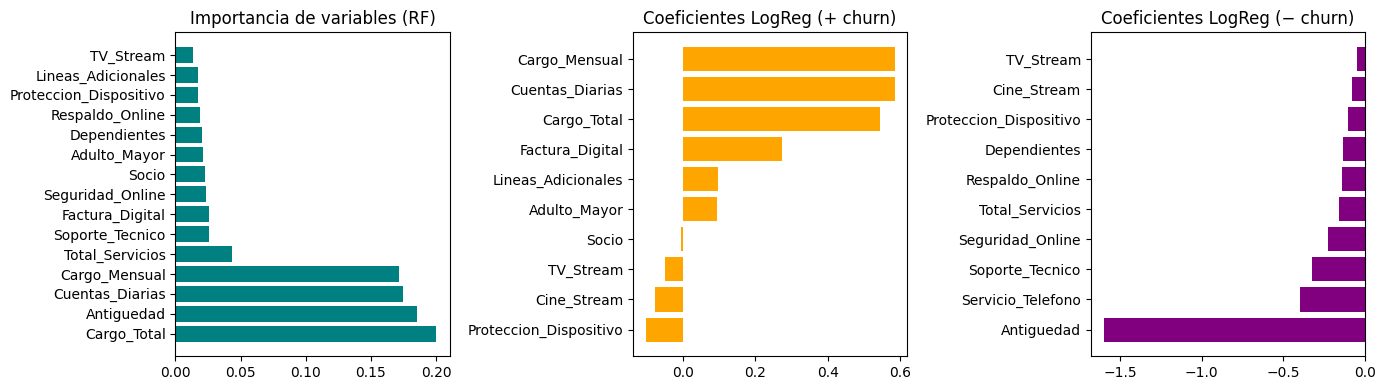

In [84]:
fig, axs = plt.subplots(1, 3, figsize=(14,4))  # 1 fila, 3 columnas

# ----------------------------
# Random Forest - Importancia
# ----------------------------
imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(15)
axs[0].barh(imp.index[::-1], imp.values[::-1], color="teal")
axs[0].set_title("Importancia de variables (RF)")
axs[0].invert_yaxis()

# ----------------------------
# LogReg (+ churn)
# ----------------------------
coefs = pd.Series(log_reg.named_steps["model"].coef_[0], index=X_train.columns).sort_values()
axs[1].barh(coefs.tail(10).index, coefs.tail(10).values, color="orange")
axs[1].set_title("Coeficientes LogReg (+ churn)")

# ----------------------------
# LogReg (‚àí churn)
# ----------------------------
axs[2].barh(coefs.head(10).index, coefs.head(10).values, color="purple")
axs[2].set_title("Coeficientes LogReg (‚àí churn)")

plt.tight_layout()
plt.show()

# Conclusi√≥n

# üìã Informe Final ‚Äì Telecom X (Parte 2):
 Predicci√≥n de Cancelaci√≥n (Churn)

## 1) Resumen Ejecutivo
- **Objetivo:** predecir qu√© clientes tienen mayor probabilidad de cancelar (churn) para priorizar acciones de retenci√≥n.
- **Datos:** 7000 + registros, variables num√©ricas (Antiguedad, Cargos) y categ√≥ricas (Contrato, M√©todo de pago, Tipo de internet, etc.).
- **Modelos evaluados:** Regresi√≥n Log√≠stica (con escalado) y Random Forest (sin escalado).
- **Hallazgos clave:** el churn se asocia principalmente con **Contrato mes a mes**, **baja antig√ºedad**, **cargos mensuales elevados** y **pago con Electronic check**.
- **Recomendaci√≥n:** usar el modelo con mejor ROC-AUC/Recall para detecci√≥n de riesgo y activar campa√±as dirigidas.

## 2) Preparaci√≥n de Datos (ETL resumido)
- **Limpieza:** tratamiento de ausentes, formateo de tipos, estandarizaci√≥n de categor√≠as.
- **Eliminaci√≥n de columnas irrelevantes:** ID_Cliente, Genero, Tipo de Internet.
- **Engineering/Transformaci√≥n:**
  - Codificaci√≥n de variables categ√≥ricas (one-hot/dummies) para `Contrato`, `Tipo_Internet`, `Metodo_Pago`, `Genero`.
  - Variables num√©ricas utilizadas: `Antiguedad`, `Cargo_Mensual`, `Cargo_Total`, `Cuentas_Diarias`, `Total_Servicios`.
- **Objetivo:** `Cancelado` (0 = activo, 1 = cancelado).
- **Desbalance observado:** ~73% activos vs ~27% cancelados (moderado).

## 3) An√°lisis Exploratorio Dirigido
- **Antiguedad √ó Cancelaci√≥n:** clientes con menor antig√ºedad cancelan m√°s.
- **Cargo Total √ó Cancelaci√≥n:** tendencia a mayor churn con facturaci√≥n acumulada baja/temprana.
- **Distribuci√≥n por contrato y m√©todo de pago:** mayor churn en **Month-to-month** y **Electronic check**.

## 4) Correlaci√≥n y Selecci√≥n de Variables
- Matriz de correlaci√≥n (solo num√©ricas/booleanas) y ranking con `Cancelado`.
- Patrones esperados:
  - **Antiguedad** correlaci√≥n **negativa** con churn.
  - **Cargos mensuales** correlaci√≥n **positiva** moderada.
  - Dummies de **Contrato** y **M√©todo de pago** con asociaci√≥n relevante.

## 5) Divisi√≥n de Datos y Preprocesamiento para Modelado
- **Train/Test split:** estratificado (p.ej., 70/30) para mantener la proporci√≥n de clases.
- **Normalizaci√≥n:** aplicada solo para modelos sensibles a escala (Regresi√≥n Log√≠stica).
- **√Årboles (Random Forest):** sin necesidad de escalado.

## 6) Modelos Entrenados y M√©tricas

### 6.1 Modelos
- **Regresi√≥n Log√≠stica** (pipeline: `StandardScaler` + `LogisticRegression`).
- **Random Forest** (300 √°rboles, semilla fija).

### 6.2 M√©tricas en Test
*(Pega aqu√≠ tu tabla de m√©tricas ya calculada: Accuracy, Precision, Recall, F1, ROC-AUC.)*  
**Ejemplo de interpretaci√≥n**:
- **Regresi√≥n Log√≠stica**: mejor ROC-AUC y buen equilibrio entre precisi√≥n/recall.
- **Random Forest**: rendimiento competitivo; puede capturar relaciones no lineales.

### 6.3 Diagn√≥stico de Over/Underfitting
- Comparaci√≥n **train vs test** mostr√≥:
  - LogReg: generalizaci√≥n estable (coeficientes interpretables).
  - RF: vigilar posibles brechas entre train/test (regularizaci√≥n mediante `max_depth`, `min_samples_leaf` si fuera necesario).

## 7) Importancia de Variables e Interpretaci√≥n
- **Random Forest ‚Äì Importancia:** top variables (p. ej., `Contrato_*`, `Antiguedad`, `Cargo_Mensual`, `Metodo_Pago_*`).
- **Regresi√≥n Log√≠stica ‚Äì Coeficientes (estandarizados):**
  - **Positivos (+)** ‚Üí aumentan probabilidad de churn (ej.: `Contrato_Month-to-month`, `Metodo_Pago_Electronic check`, `Cargo_Mensual`).
  - **Negativos (‚Äì)** ‚Üí reducen churn (ej.: **mayor Antiguedad**, contratos largos).

**Conclusi√≥n interpretativa:**  
- Mayor riesgo de cancelaci√≥n en clientes:
  - Con **contratos mensuales**,
  - **Baja antiguedad**,
  - **Pagos por electronic check**,
  - **Cargos mensuales elevados** (posible sensibilidad a precio/valor).

## 8) Recomendaciones de Negocio (Accionables)
1. **Migraci√≥n a contratos largos:** descuentos/bonos para pasar de Month-to-month a One/Two year.
2. **Programa de onboarding y fidelizaci√≥n en primeros 6‚Äì12 meses:** atenci√≥n prioritaria, beneficios y seguimiento proactivo.
3. **Incentivar m√©todos de pago autom√°ticos:** beneficios por domicilio/CC para reducir churn asociado a `Electronic check`.
4. **Revisi√≥n de oferta para altos cargos mensuales:** bundles/planes escalonados que mejoren percepci√≥n de valor.
5. **Monitoreo t√©cnico (Fiber optic):** investigar causas de insatisfacci√≥n en ese segmento.

## 9) Pr√≥ximos Pasos (Mejoras del Modelo)
- **Balanceo de clases (pendiente a solicitud):**
  - `class_weight='balanced'` en LogReg/RF y/o **SMOTE** en train.
  - Comparar **Recall/F1 de la clase 1 (cancelados)** antes/despu√©s.
- **Ajuste de hiperpar√°metros:**
  - LogReg (`C`, regularizaci√≥n), RF (`max_depth`, `min_samples_*`, `max_features`, `n_estimators`).
- **Validaci√≥n cruzada estratificada (CV)** para robustez de resultados.
- **Explicabilidad adicional:** SHAP/Permutaci√≥n de importancias.
- **Despliegue:** guardar pipeline y preparar inferencia con umbral de decisi√≥n ajustado al costo del falso negativo.

## 10) Conclusi√≥n
El estudio muestra que **Contrato**, **Antiguedad**, **Cargos** y **M√©todo de pago** son determinantes del churn.  
El modelo con mejor equilibrio (seg√∫n tu tabla de m√©tricas) debe usarse para **priorizar clientes en riesgo** y activar las **acciones de retenci√≥n** listadas.  
La incorporaci√≥n de **balanceo de clases** y **tuning** puede mejorar el **Recall/F1** en la clase minoritaria, incrementando la detecci√≥n temprana de cancelaciones.

